In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import sympy as sym


In [3]:
# задание 1
#Постройте трехмерный график функции А также график линий уровня с уровнями (1,5,10)
x1=sym.Symbol('x1')
x2=sym.Symbol('x2')
func1 = x2**2 - x1**2*x2 + 2*x1*x2
func1

-x1**2*x2 + 2*x1*x2 + x2**2

C:\Users\leee\AppData\Local\Temp/ipykernel_35760/60622351.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


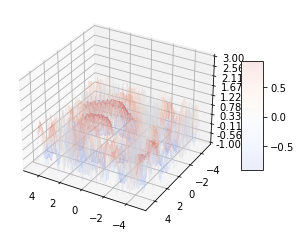

In [4]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = Y**2 - X**2*Y + 2*X*Y
Z = np.sin(R)
# Z = func02(X,Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,alpha=0.1)

# Customize the z axis.
ax.set_zlim(-1, 3.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.azim = 120
ax.dist = 10
ax.elev = 30

plt.show()

In [20]:
#задание №2 Вычислить вектор градиента и матрицу Гессе для функции в точке м(2,1,1): 
x1=sym.Symbol('x1')
x2=sym.Symbol('x2')
x3=sym.Symbol('x3')
func = 2*x1**3-3*x1*x2+2*x2*x3**3-x2**3
func

2*x1**3 - 3*x1*x2 - x2**3 + 2*x2*x3**3

In [6]:
#производные
d1_x1 = sym.diff(2*x1**3-3*x1*x2+2*x2*x3**3-x2**3, x1)
d1_x2 = sym.diff(2*x1**3-3*x1*x2+2*x2*x3**3-x2**3, x2)
d1_x3 = sym.diff(2*x1**3-3*x1*x2+2*x2*x3**3-x2**3, x3)
d1_x3

6*x2*x3**2

In [7]:
#вектор градиента
np.array([[d1_x1.subs([(x1,2),(x2,1),(x3,1)])],[d1_x2.subs([(x1,2),(x2,1),(x3,1)])],[d1_x3.subs([(x1,2),(x2,1),(x3,1)])]])

array([[21],
       [-7],
       [6]], dtype=object)

In [9]:
#матрица Гессе
matrix = np.array([[sym.diff(d1_x1,x1),sym.diff(d1_x1,x2),sym.diff(d1_x1,x3)],
          [sym.diff(d1_x2,x1),sym.diff(d1_x2,x2),sym.diff(d1_x2,x3)],
         [sym.diff(d1_x3,x1),sym.diff(d1_x3,x2),sym.diff(d1_x3,x3)]])
matrix

array([[12*x1, -3, 0],
       [-3, -6*x2, 6*x3**2],
       [0, 6*x3**2, 12*x2*x3]], dtype=object)

In [37]:
#Задание 3
#Для функции из задания 2 с использованием критерия Сильвестра определить является ли матрица Гессе положительно 
#определенной в точке K(2,-5,-3)
#все знаки положительные  => положительно определена согласно критерию Сильвестра
det1=np.array((sym.diff(d1_x1,x1)).subs(x1,2),dtype='float64' )
det2 = np.array([[sym.diff(d1_x1,x1).subs(x1,2),sym.diff(d1_x1,x2)],
                  [sym.diff(d1_x2,x1),sym.diff(d1_x2,x2).subs(x2,-5)]], dtype='float64')

det3= np.array([[sym.diff(d1_x1,x1).subs(x1,2),sym.diff(d1_x1,x2),sym.diff(d1_x1,x3)],
          [sym.diff(d1_x2,x1),sym.diff(d1_x2,x2).subs(x2,-5),sym.diff(d1_x2,x3).subs(x3,-3)],
         [sym.diff(d1_x3,x1),sym.diff(d1_x3,x2).subs(x3,-3),(sym.diff(d1_x3,x3)).subs([(x2,-5),(x3,-3)])]], dtype='float64')
det1# определитель 1-го минора - матрица 1х1 => число 24

array(24.)

In [38]:
np.linalg.det(det2)#положительный знак 2-го минора

710.9999999999998

In [40]:
np.linalg.det(det3)#положительный знак 3-го минора

57995.99999999998